## 1. Set up the experiment

### 1-1. Import modules

In [1]:
from    pathlib             import  Path
from    tqdm.notebook       import  tqdm

import  numpy                       as  np
import  torch

import  matplotlib.pyplot       as  plt

from    custom_modules.dtypes       import  MultiLevelGraph
from    custom_modules.utils        import  get_time_str, node_idx_to_arr_idx
from    custom_modules.utils        import  npzReader
from    custom_modules.utils        import  RandomMultiGridGenerator
from    custom_modules.plot         import  plot_2d_graph

### 1-2. Load the configurations

### 1-3. Set the experiment

In [2]:
# NOTE Training and data preprocess

GRID            = 11
NUM_NODES       = GRID ** 2

## 2. Plot the graph

### 2-1. Generate the graph

In [8]:
# NOTE Generate a grid to set the node and edge attributes


grid_generator  = RandomMultiGridGenerator(
                        domain      = [[0., 1.], [0., 1.]],
                        grid_size   = [GRID, GRID],
                        sample_sizes    = [80, 40, 20],
                        
                        radii_geometric = [0.2, 2],
                        max_neighbors   = [10, 5, 5],
                        allow_loop      = True,
                    )
grid_generator.sample()

multigrid_index         = grid_generator.multigrid_index
multigraph_coords       = grid_generator.multigraph_coordinates
multigraph_edge_index   = grid_generator.multigraph_edge_index
merged_grid_index       = grid_generator.merged_grid_index
merged_graph_coords     = grid_generator.merged_graph_coordinates
merged_graph_edge_index = grid_generator.merged_graph_edge_index


print(f"SAMPLING_MODE: {grid_generator.sampling_mode}")

print("MULTIGRID_NODE_INDEX")
for p in multigrid_index:
    print(p.shape.numel(), p.tolist())

print('\n\n')

print("MULTIGRID_EDGE_INDEX")
# print(multigraph_edge_index)
for p in multigraph_edge_index:
    print(p.shape)

SAMPLING_MODE: nested
MULTIGRID_NODE_INDEX
80 [26, 6, 48, 35, 10, 15, 87, 57, 89, 101, 73, 9, 97, 31, 74, 91, 38, 11, 18, 113, 63, 112, 78, 114, 115, 43, 98, 61, 83, 88, 32, 29, 75, 16, 72, 65, 62, 119, 51, 117, 76, 22, 68, 81, 13, 34, 44, 85, 41, 100, 47, 58, 7, 59, 120, 24, 70, 8, 104, 54, 50, 102, 56, 66, 95, 1, 45, 14, 71, 79, 111, 21, 53, 80, 52, 28, 27, 37, 69, 67]
40 [26, 6, 48, 35, 10, 15, 87, 57, 89, 101, 73, 9, 97, 31, 74, 91, 38, 11, 18, 113, 63, 112, 78, 114, 115, 43, 98, 61, 83, 88, 32, 29, 75, 16, 72, 65, 62, 119, 51, 117]
20 [26, 6, 48, 35, 10, 15, 87, 57, 89, 101, 73, 9, 97, 31, 74, 91, 38, 11, 18, 113]



MULTIGRID_EDGE_INDEX
torch.Size([2, 476])
torch.Size([2, 87])
torch.Size([2, 18])


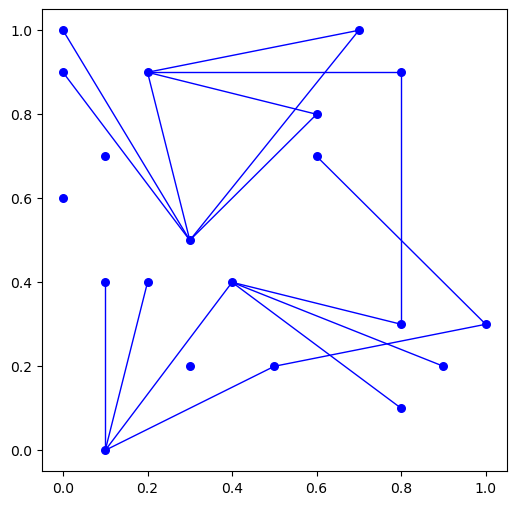

In [12]:
markers = ('v', 'P', '*')
colors  = ('r', 'g', 'b')
linestyles = ('solid', 'dotted', 'dotted')

plt.figure(figsize = (6, 6))
for idx in [2]:
    plot_2d_graph(
        grid_generator.multigraph_coordinates[idx],
        grid_generator.levelwise_edge_index[idx],
        marker_size     = 30,
        marker_color    = colors[idx],
    )
plt.show()

## End of file